In [ ]:
import cv2
import numpy as np
from skimage.feature import hog
from sklearn.svm import LinearSVC
from keras.datasets import mnist
from sklearn.metrics import accuracy_score
from google.colab.patches import cv2_imshow

In [ ]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()
X_train_feature = []
for i in range(len(X_train)):
    feature = hog(X_train[i],orientations=9,pixels_per_cell=(14,14),cells_per_block=(1,1),block_norm="L2")
    X_train_feature.append(feature)
X_train_feature = np.array(X_train_feature,dtype = np.float32)

X_test_feature = []
for i in range(len(X_test)):
    feature = hog(X_test[i],orientations=9,pixels_per_cell=(14,14),cells_per_block=(1,1),block_norm="L2")
    X_test_feature.append(feature)
X_test_feature = np.array(X_test_feature,dtype=np.float32)
model = LinearSVC(C=10)
model.fit(X_train_feature,y_train)
y_pre = model.predict(X_test_feature)
print(accuracy_score(y_test,y_pre))


0.8988


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


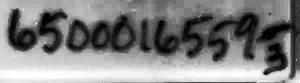

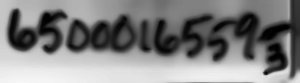

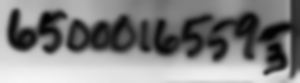

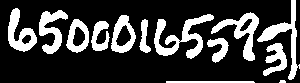

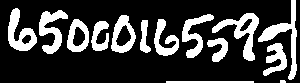

In [ ]:
image = cv2.imread("/content/text1.png")
B, G, R = cv2.split(image)
B = cv2.equalizeHist(B)
G = cv2.equalizeHist(G)
R = cv2.equalizeHist(R)
out = cv2.merge((B,G,R))
cv2_imshow(out)
noiseless_image_colored = cv2.fastNlMeansDenoisingColored(out , None, 20, 20, 8, 21)
cv2_imshow(noiseless_image_colored)
# noiseless_image_colored = cv2.convertScaleAbs(noiseless_image_colored, alpha=1.5, beta=50)
# cv2_imshow(noiseless_image_colored)
gray = cv2.cvtColor(noiseless_image_colored, cv2.COLOR_BGR2GRAY)
blur = gray
blur = cv2.GaussianBlur(gray, (7, 7), 0)
cv2_imshow(blur)
thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
cv2_imshow(thresh)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
# thresh = cv2.dilate(thresh, kernel, iterations=1)
thresh = cv2.erode(thresh, kernel, iterations=1) #img 1
# thresh = cv2.dilate(thresh, kernel, iterations=2) #img2
# thresh = cv2.erode(thresh, kernel, iterations=1)
thresh = cv2.dilate(thresh, kernel, iterations=1) #img3/
cv2_imshow(thresh)
# kernel = np.ones((3, 3), np.uint8)
# thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
rects = [cv2.boundingRect(cnt) for cnt in contours]

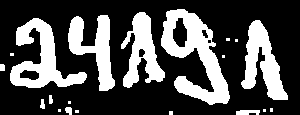

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(thresh)

2


6


8


6


0


0


5


8


5


5


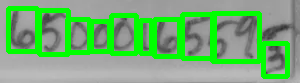

In [ ]:
from google.colab.patches import cv2_imshow
for i in contours:
    (x,y,w,h) = cv2.boundingRect(i)
    if w < 5 or h < 25 or w > 100 or h > 70: #Text1
    # if w < 25 or h < 30 or w > 100 or h > 100: #Text2
    # if w < 10 or h < 30 or w > 100 or h > 100: #Text3
        continue
    cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),3)
    roi = thresh[y:y+h,x:x+w]
    roi = np.pad(roi,(20,20),'constant',constant_values=(0,0))
    roi = cv2.resize(roi, (28, 28), interpolation=cv2.INTER_AREA)
    # roi = cv2.erode(roi, (3,3),iterations=1)
    # roi = cv2.dilate(roi, (3, 3),iterations=1)
    roi = cv2.erode(roi, (3,3),iterations=1)
    # roi = cv2.dilate(roi, (3, 3),iterations=1)

    cv2_imshow(roi)

    # Calculate the HOG features
    roi_hog_fd = hog(roi, orientations=9, pixels_per_cell=(14, 14), cells_per_block=(1, 1),block_norm="L2")
    # cv2_imshow(roi_hog_fd)
    nbr = model.predict(np.array([roi_hog_fd], np.float32))
    print(str(int(nbr[0])))
    # cv2.putText(image, str(int(nbr[0])), (x, y),cv2.FONT_HERSHEY_DUPLEX, 2, (0, 255, 255), 3)
cv2_imshow(image)



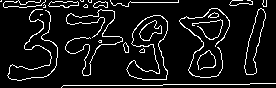

In [ ]:
edges = cv2.Canny(thresh, 30, 100)
# edges = cv2.dilate(edges, kernel, iterations=1)
# edges = cv2.erode(edges, kernel, iterations=1)
cv2_imshow(edges)
contours, hierarchy = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)